This notebook will carry all the steps to extract the tweets from Twitter and create DataFrames and csv files for the airlines.

Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
import seaborn as sns
import tweepy
%matplotlib inline

Access Keys

In [2]:
consumer_key = "rnJxjHwFGdHzu4Uz8ksnc4xHh"
consumer_secret = "jKCnVElOmk4lhi9uVKkozSOrSYKEmNuLLO5QCP1CIZ4yye1yYc"
access_token = "400927565-O9z7W7ucgL7esDLkRg2e4JSTfiNSTixqlf2tmC7i"
access_token_secret = "Oe2ohU0flKGf1HUn0ZkVTXmJ2tA3IgXCjkyFgo9x75imF"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
#creating the API object while passing in auth information
api = tweepy.API(auth, wait_on_rate_limit=True)

Extract Tweets for Emirates

In [4]:
query = '@emiratessupport -filter:retweets'
max_tweets = 1000
tweets_emirates = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [5]:
emir_data = pd.DataFrame(data=[tweet.text for tweet in tweets_emirates], columns = ['Tweets'])

In [6]:
emir_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 1 columns):
Tweets    431 non-null object
dtypes: object(1)
memory usage: 3.4+ KB


In [79]:
pd.set_option('display.max_colwidth', -1)

In [9]:
emir_data.head()

,Tweets
0,@EmiratesSupport Hi!\nWhat is going on with the US and Iran. Will the connection flights from DXB to Asia be affecte… https://t.co/Ea2PFJGQXb
1,"@EmiratesSupport hello, I am migrating to Australia soon and was wondering if I can take my AV-receiver on board as… https://t.co/Ir7qzjlKZu"
2,hey @EmiratesSupport! Is there any easy way to see if there’s a specific tv show or film on ice online. i can see t… https://t.co/CfrblhCyRJ
3,@EmiratesSupport is it possible to get champagne on board?
4,.@EmiratesSupport Flew today in Economy on EK8 from LHR to DXB and paid for the premium $15.99 WiFi. It was awful!… https://t.co/0uRCvbriD9


In [10]:
# add relevant data to dataframe:
emir_data['len']  = np.array([len(tweet.text) for tweet in tweets_emirates])
emir_data['ID']   = np.array([tweet.id for tweet in tweets_emirates])
emir_data['Date'] = np.array([tweet.created_at for tweet in tweets_emirates])
emir_data['Source'] = np.array([tweet.source for tweet in tweets_emirates])
emir_data['Likes']  = np.array([tweet.favorite_count for tweet in tweets_emirates])
emir_data['RTs']    = np.array([tweet.retweet_count for tweet in tweets_emirates])

In [11]:
emir_data.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,@EmiratesSupport Hi!\nWhat is going on with the US and Iran. Will the connection flights from DXB to Asia be affecte… https://t.co/Ea2PFJGQXb,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0
1,"@EmiratesSupport hello, I am migrating to Australia soon and was wondering if I can take my AV-receiver on board as… https://t.co/Ir7qzjlKZu",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0
2,hey @EmiratesSupport! Is there any easy way to see if there’s a specific tv show or film on ice online. i can see t… https://t.co/CfrblhCyRJ,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0
3,@EmiratesSupport is it possible to get champagne on board?,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0
4,.@EmiratesSupport Flew today in Economy on EK8 from LHR to DXB and paid for the premium $15.99 WiFi. It was awful!… https://t.co/0uRCvbriD9,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0


In [12]:
emir_data.to_csv("emirates.csv", header=True, index=False, encoding='utf-8')

In [5]:
emirates_clean = pd.read_csv('emirates.csv')

In [6]:
emirates_clean.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0


## Cleaning Emirates Data

In [7]:
#Function to remove URL 
def url_clean(text):
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''',
                  "", 
                  text)

In [8]:
emirates_clean['tweet_no_url'] = emirates_clean['Tweets'].apply(lambda x: url_clean(x))

In [9]:
emirates_clean.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,@EmiratesSupport Hi!\nWhat is going on with th...
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"@EmiratesSupport hello, I am migrating to Aust..."
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey @EmiratesSupport! Is there any easy way to...
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,@EmiratesSupport is it possible to get champag...
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,.@EmiratesSupport Flew today in Economy on EK8...


In [10]:
#Remove twitter handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [11]:
#Remove twitter handles
emirates_clean['tweet_no_url'] = np.vectorize(remove_pattern)(emirates_clean['tweet_no_url'], "@[\w]*")

In [12]:
emirates_clean.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w..."
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...


In [13]:
emirates_clean.to_csv("emirates_cleaner.csv", header=True, index=False, encoding='utf-8')

## Exploratory Data Analysis

### Date Time Analysis

Convert Datetime to Date

In [14]:
emirates_clean.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w..."
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...


In [15]:
import dateutil.parser

In [ ]:
b = "2015-10-28 16:09:59"


d = dateutil.parser.parse(b).date()
print d

In [16]:
emirates_clean['Date_Only'] = emirates_clean['Date'].apply(lambda x: dateutil.parser.parse(x).date())

In [17]:
emirates_clean.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20


In [18]:
date_count = emirates_clean['Date_Only'].value_counts()

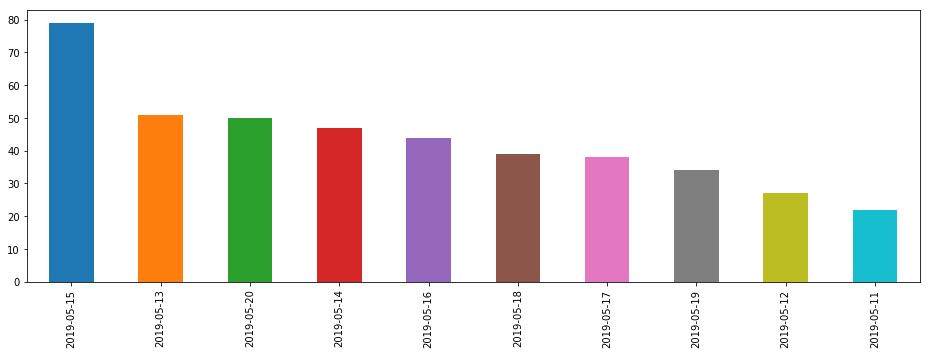

In [20]:
date_count.plot.bar(figsize= (16,5))

Not a very significant spike but higher than the rest on 5-15-2019. I checked for any significant aviation events for that day and nothing has come up. There is a chance that since weekday flights may be cheaper there could be a higher passenger presence.

### Source of Tweets

In [23]:
# List of all sources of the Tweets:
sources = []
for source in emirates_clean['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter for Android
* Twitter Web App
* Twitter for iPad
* Twitter Web Client
* Twitterrific for Mac
* TweetDeck
* Tweetbot for iΟS
* Flamingo for Android
* Fenix 2


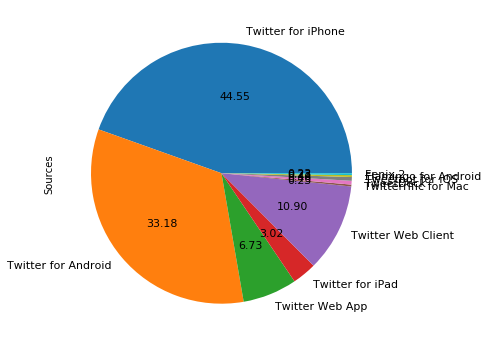

In [24]:
# Pie Chart
percent = np.zeros(len(sources))

for source in emirates_clean['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

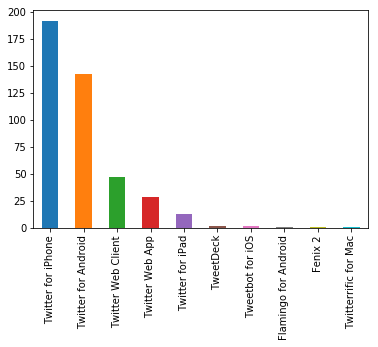

In [25]:
source_count_bar = emirates_clean['Source'].value_counts().plot.bar()

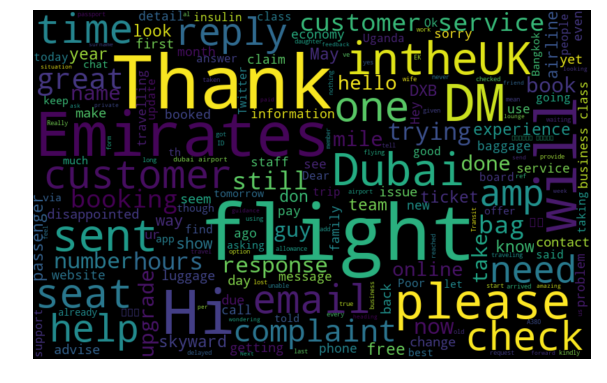

In [26]:
#wordcloud on DF Tweets
all_words = ' '.join([text for text in emirates_clean['tweet_no_url']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Naturally, Dubai and flight would be common words in this scenario.

Lets check the sentiment analysis with complete text before we remove stop words.

In [27]:
from textblob import TextBlob
import re

In [28]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [29]:
#create column with analysis results
emirates_clean['SA'] = np.array([analyze_sentiment(tweet) for tweet in emirates_clean['tweet_no_url']])

In [30]:
emirates_clean.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,SA
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,0
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,0
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,1
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,0
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,0
5,"@EmiratesSupport Thanks! As a suggestion, mayb...",140,1130544347043258372,2019-05-20 18:42:31,Twitter for iPhone,0,0,"Thanks! As a suggestion, maybe could you star...",2019-05-20,1
6,"Next week, my friend, colleague and all round ...",127,1130540924570865664,2019-05-20 18:28:55,Twitter for iPhone,4,3,"Next week, my friend, colleague and all round ...",2019-05-20,1
7,@EmiratesSupport how often do you update music...,140,1130532881808482310,2019-05-20 17:56:57,Twitter for iPhone,0,0,how often do you update music on ICE? It woul...,2019-05-20,1
8,My poor brother who is on the autism spectrum ...,140,1130525612869902336,2019-05-20 17:28:04,Twitter for Android,1,0,My poor brother who is on the autism spectrum ...,2019-05-20,-1
9,@EmiratesSupport hi both my wife and I just cr...,139,1130523024661393408,2019-05-20 17:17:47,Twitter for Android,0,0,hi both my wife and I just created a family r...,2019-05-20,0


Tweet indexed 4 seems like a negative tweet but listed as nuetral, perhaps we have to tweak the parameters more.

In [31]:
#lists with classified tweets
pos_tweets = [tweet for index, tweet in enumerate(emirates_clean['tweet_no_url']) if emirates_clean['SA'][index] > 0]
neutral_tweets = [tweet for index, tweet in enumerate(emirates_clean['tweet_no_url']) if emirates_clean['SA'][index] == 0]
neg_tweets = [tweet for index, tweet in enumerate(emirates_clean['tweet_no_url']) if emirates_clean['SA'][index] < 0]

In [32]:
#print SA percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(emirates_clean['tweet_no_url'])))
print("Percentage of neutral tweets: {}%".format(len(neutral_tweets)*100/len(emirates_clean['tweet_no_url'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(emirates_clean['tweet_no_url'])))

Percentage of positive tweets: 29.00232018561485%
Percentage of neutral tweets: 52.90023201856148%
Percentage de negative tweets: 18.097447795823665%


There is a chance the negative tweets have not been picked up and are sitting in the neutral tweets

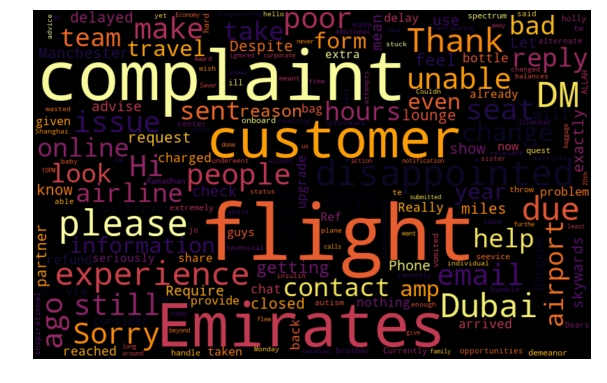

In [33]:
#wordcloud on negative tweets
neg_words = ' '.join([text for text in neg_tweets])
wordcloud = WordCloud(width=800, height=500, random_state=21, colormap='inferno', max_font_size=110).generate(neg_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

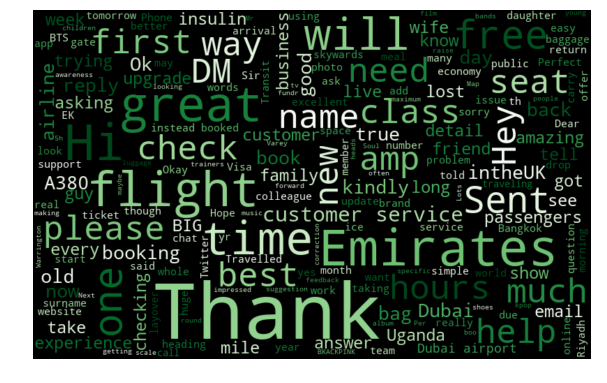

In [34]:
# wordcloud on positive tweets
pos_words = ' '.join([text for text in pos_tweets])
wordcloud = WordCloud(width=800, height=500, colormap='Greens',random_state=21, max_font_size=110).generate(pos_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Tokenize Tweets

In [35]:
emirates_clean['tokenized'] = emirates_clean['tweet_no_url'].apply(lambda x: x.split())

In [36]:
emirates_clean.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,SA,tokenized
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,0,"[Hi!, What, is, going, on, with, the, US, and,..."
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,0,"[hello,, I, am, migrating, to, Australia, soon..."
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,1,"[hey, !, Is, there, any, easy, way, to, see, i..."
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,0,"[is, it, possible, to, get, champagne, on, boa..."
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,0,"[., Flew, today, in, Economy, on, EK8, from, L..."


Remove Stop Words

In [37]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [38]:
emirates_clean['no_stop_words'] = emirates_clean['tokenized'].apply(lambda x: [item for item in x if item not in stop])

In [39]:
emirates_clean.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,SA,tokenized,no_stop_words
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,0,"[Hi!, What, is, going, on, with, the, US, and,...","[Hi!, What, going, US, Iran., Will, connection..."
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,0,"[hello,, I, am, migrating, to, Australia, soon...","[hello,, I, migrating, Australia, soon, wonder..."
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,1,"[hey, !, Is, there, any, easy, way, to, see, i...","[hey, !, Is, easy, way, see, there’s, specific..."
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,0,"[is, it, possible, to, get, champagne, on, boa...","[possible, get, champagne, board?]"
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,0,"[., Flew, today, in, Economy, on, EK8, from, L...","[., Flew, today, Economy, EK8, LHR, DXB, paid,..."


### Sentiment Analysis with Vader Sentiment

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/AbbasQ/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    #polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

## Calculating the scores for Vader

In [42]:
i=0 #counter

calculated_vader = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(emirates_clean)):

    k = sid.polarity_scores(emirates_clean.iloc[i]['tweet_no_url'])
    calculated_vader.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

calculated_vader = np.array(calculated_vader)

len(calculated_vader)

431

In [43]:
emirates_clean['VADER_compound'] = calculated_vader

In [44]:
emirates_clean.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,SA,tokenized,no_stop_words,VADER_compound
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,0,"[Hi!, What, is, going, on, with, the, US, and,...","[Hi!, What, going, US, Iran., Will, connection...",0.0000
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,0,"[hello,, I, am, migrating, to, Australia, soon...","[hello,, I, migrating, Australia, soon, wonder...",0.0000
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,1,"[hey, !, Is, there, any, easy, way, to, see, i...","[hey, !, Is, easy, way, see, there’s, specific...",0.4926
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,0,"[is, it, possible, to, get, champagne, on, boa...","[possible, get, champagne, board?]",0.2960
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,0,"[., Flew, today, in, Economy, on, EK8, from, L...","[., Flew, today, Economy, EK8, LHR, DXB, paid,...",0.0000


## Sorting the scores to categories

In [46]:
#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(emirates_clean)):
    if ((emirates_clean.iloc[i]['VADER_compound'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((emirates_clean.iloc[i]['VADER_compound'] > 0) & (emirates_clean.iloc[i]['VADER_compound'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((emirates_clean.iloc[i]['VADER_compound'] <= 0)):
        predicted_value.append('negative')
        i = i+1

In [47]:
emirates_clean['VADER_sentiment'] = predicted_value

In [48]:
emirates_clean.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,SA,tokenized,no_stop_words,VADER_compound,VADER_sentiment
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,0,"[Hi!, What, is, going, on, with, the, US, and,...","[Hi!, What, going, US, Iran., Will, connection...",0.0000,negative
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,0,"[hello,, I, am, migrating, to, Australia, soon...","[hello,, I, migrating, Australia, soon, wonder...",0.0000,negative
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,1,"[hey, !, Is, there, any, easy, way, to, see, i...","[hey, !, Is, easy, way, see, there’s, specific...",0.4926,neutral
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,0,"[is, it, possible, to, get, champagne, on, boa...","[possible, get, champagne, board?]",0.2960,neutral
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,0,"[., Flew, today, in, Economy, on, EK8, from, L...","[., Flew, today, Economy, EK8, LHR, DXB, paid,...",0.0000,negative


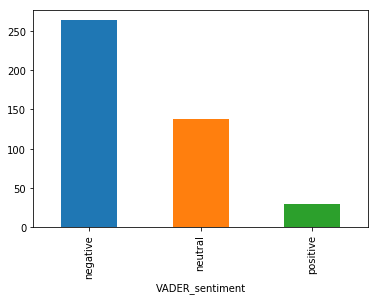

In [49]:
emirates_clean.groupby('VADER_sentiment').size().plot(kind='bar')

In [50]:
emirates_copy = emirates_clean.copy()

In [51]:
emirates_copy.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,SA,tokenized,no_stop_words,VADER_compound,VADER_sentiment
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,0,"[Hi!, What, is, going, on, with, the, US, and,...","[Hi!, What, going, US, Iran., Will, connection...",0.0000,negative
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,0,"[hello,, I, am, migrating, to, Australia, soon...","[hello,, I, migrating, Australia, soon, wonder...",0.0000,negative
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,1,"[hey, !, Is, there, any, easy, way, to, see, i...","[hey, !, Is, easy, way, see, there’s, specific...",0.4926,neutral
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,0,"[is, it, possible, to, get, champagne, on, boa...","[possible, get, champagne, board?]",0.2960,neutral
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,0,"[., Flew, today, in, Economy, on, EK8, from, L...","[., Flew, today, Economy, EK8, LHR, DXB, paid,...",0.0000,negative


Here we have a comparison table of TextBlob Sentiment Analysis and VADER sentiment side by side to compare who is doing a better job catching sentiments.

Lets add a column that shows the sentiment as either 1, 0, or -1 for Vader Sentiment so we can use it on our train test set.

In [52]:
#Assigning score categories and logic
i = 0

predicted_number = [ ] #empty series to hold our predicted values

while(i<len(emirates_clean)):
    if ((emirates_clean.iloc[i]['VADER_compound'] >= 0.7)):
        predicted_number.append('1')
        i = i+1
    elif ((emirates_clean.iloc[i]['VADER_compound'] > 0) & (emirates_clean.iloc[i]['VADER_compound'] < 0.7)):
        predicted_number.append('0')
        i = i+1
    elif ((emirates_clean.iloc[i]['VADER_compound'] <= 0)):
        predicted_number.append('-1')
        i = i+1

In [53]:
emirates_copy['VADER_SA'] = predicted_number

In [54]:
emirates_copy.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,SA,tokenized,no_stop_words,VADER_compound,VADER_sentiment,VADER_SA
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,0,"[Hi!, What, is, going, on, with, the, US, and,...","[Hi!, What, going, US, Iran., Will, connection...",0.0000,negative,-1
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,0,"[hello,, I, am, migrating, to, Australia, soon...","[hello,, I, migrating, Australia, soon, wonder...",0.0000,negative,-1
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,1,"[hey, !, Is, there, any, easy, way, to, see, i...","[hey, !, Is, easy, way, see, there’s, specific...",0.4926,neutral,0
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,0,"[is, it, possible, to, get, champagne, on, boa...","[possible, get, champagne, board?]",0.2960,neutral,0
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,0,"[., Flew, today, in, Economy, on, EK8, from, L...","[., Flew, today, Economy, EK8, LHR, DXB, paid,...",0.0000,negative,-1


Create a new dataframe with just the text and Vader SA as its target

In [55]:
emirates_VSA = emirates_copy.copy()

In [56]:
emirates_VSA.drop(['SA', 'VADER_compound', 'VADER_SA'], axis=1, inplace=True)

In [57]:
emirates_VSA.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,tokenized,no_stop_words,VADER_sentiment
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,"[Hi!, What, is, going, on, with, the, US, and,...","[Hi!, What, going, US, Iran., Will, connection...",negative
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,"[hello,, I, am, migrating, to, Australia, soon...","[hello,, I, migrating, Australia, soon, wonder...",negative
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,"[hey, !, Is, there, any, easy, way, to, see, i...","[hey, !, Is, easy, way, see, there’s, specific...",neutral
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,"[is, it, possible, to, get, champagne, on, boa...","[possible, get, champagne, board?]",neutral
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,"[., Flew, today, in, Economy, on, EK8, from, L...","[., Flew, today, Economy, EK8, LHR, DXB, paid,...",negative


In [58]:
emirates_train = emirates_copy.copy()

In [59]:
emirates_train.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,SA,tokenized,no_stop_words,VADER_compound,VADER_sentiment,VADER_SA
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,0,"[Hi!, What, is, going, on, with, the, US, and,...","[Hi!, What, going, US, Iran., Will, connection...",0.0000,negative,-1
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,0,"[hello,, I, am, migrating, to, Australia, soon...","[hello,, I, migrating, Australia, soon, wonder...",0.0000,negative,-1
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,1,"[hey, !, Is, there, any, easy, way, to, see, i...","[hey, !, Is, easy, way, see, there’s, specific...",0.4926,neutral,0
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,0,"[is, it, possible, to, get, champagne, on, boa...","[possible, get, champagne, board?]",0.2960,neutral,0
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,0,"[., Flew, today, in, Economy, on, EK8, from, L...","[., Flew, today, Economy, EK8, LHR, DXB, paid,...",0.0000,negative,-1


In [60]:
emirates_train.drop(['SA', 'VADER_compound', 'VADER_sentiment'], axis=1, inplace=True)

In [61]:
emirates_train.head()

,Tweets,len,ID,Date,Source,Likes,RTs,tweet_no_url,Date_Only,tokenized,no_stop_words,VADER_SA
0,@EmiratesSupport Hi!\nWhat is going on with th...,140,1130588140455026688,2019-05-20 21:36:32,Twitter for iPhone,0,0,Hi!\nWhat is going on with the US and Iran. W...,2019-05-20,"[Hi!, What, is, going, on, with, the, US, and,...","[Hi!, What, going, US, Iran., Will, connection...",-1
1,"@EmiratesSupport hello, I am migrating to Aust...",140,1130582266936266752,2019-05-20 21:13:12,Twitter for Android,0,0,"hello, I am migrating to Australia soon and w...",2019-05-20,"[hello,, I, am, migrating, to, Australia, soon...","[hello,, I, migrating, Australia, soon, wonder...",-1
2,hey @EmiratesSupport! Is there any easy way to...,140,1130573210540478464,2019-05-20 20:37:13,Twitter for iPhone,0,0,hey ! Is there any easy way to see if there’s ...,2019-05-20,"[hey, !, Is, there, any, easy, way, to, see, i...","[hey, !, Is, easy, way, see, there’s, specific...",0
3,@EmiratesSupport is it possible to get champag...,58,1130569534233034752,2019-05-20 20:22:36,Twitter Web App,0,0,is it possible to get champagne on board?,2019-05-20,"[is, it, possible, to, get, champagne, on, boa...","[possible, get, champagne, board?]",0
4,.@EmiratesSupport Flew today in Economy on EK8...,139,1130554261824258049,2019-05-20 19:21:55,Twitter for iPad,0,0,. Flew today in Economy on EK8 from LHR to DXB...,2019-05-20,"[., Flew, today, in, Economy, on, EK8, from, L...","[., Flew, today, Economy, EK8, LHR, DXB, paid,...",-1


### Train Test Split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train, x_test, y_train, y_test = train_test_split(emirates_train['tweet_no_url'],
                                                    emirates_train['VADER_SA'], test_size=0.25, random_state=34)

### Vectorizer and Tfid Transformer

In [116]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [122]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm=None, sublinear_tf=True)

In [123]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [124]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(323, 1172)
(323, 1172)


In [126]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [127]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(108, 1172)
(108, 1172)


## Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [129]:
predictions = model.predict(x_test_tfidf)

In [130]:
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix(y_test, predictions)

array([[62,  2,  0],
       [22, 15,  0],
       [ 4,  3,  0]])

In [133]:
f1_score(y_test, predictions, average=None)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.81578947, 0.52631579, 0.        ])

## Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [136]:
log_model = log_model.fit(X = x_train_tfidf, y = y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [137]:
y_prediction = log_model.predict(x_test_tfidf)

In [138]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediction))

0.6666666666666666


## Naive Bayes

In [139]:
from sklearn.naive_bayes import GaussianNB

In [143]:
classifier = GaussianNB()
classifier.fit(x_train_tfidf.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [146]:
#predict test set resuts
y_pred_GNB = classifier.predict(x_test_tfidf.toarray())

In [147]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_GNB)
cm

array([[34, 17, 13],
       [13, 16,  8],
       [ 1,  3,  3]])

In [149]:
from sklearn.metrics import classification_report

In [150]:
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

          -1       0.71      0.53      0.61        64
           0       0.44      0.43      0.44        37
           1       0.12      0.43      0.19         7

   micro avg       0.49      0.49      0.49       108
   macro avg       0.43      0.46      0.41       108
weighted avg       0.58      0.49      0.52       108



## Alternate VADER Parameters

I am going to adjust the parameters for the VADER scoring so that even the Neutral classification is considered Positive, this way we only have two classes and that binary classification would help us in our Naive Bayes accuracy.

In [108]:
#Assigning score categories and logic
i = 0

predicted_value_new = [ ] #empty series to hold our predicted values

while(i<len(emirates_clean)):
    if ((emirates_clean.iloc[i]['VADER_compound'] > 0)):
        predicted_value_new.append('1')
        i = i+1
    elif ((emirates_clean.iloc[i]['VADER_compound'] <= 0)):
        predicted_value_new.append('-1')
        i = i+1

In [ ]:
# #Assigning score categories and logic
# i = 0

# predicted_number = [ ] #empty series to hold our predicted values

# while(i<len(emirates_clean)):
#     if ((emirates_clean.iloc[i]['VADER_compound'] >= 0.7)):
#         predicted_number.append('1')
#         i = i+1
#     elif ((emirates_clean.iloc[i]['VADER_compound'] > 0) & (emirates_clean.iloc[i]['VADER_compound'] < 0.7)):
#         predicted_number.append('0')
#         i = i+1
#     elif ((emirates_clean.iloc[i]['VADER_compound'] <= 0)):
#         predicted_number.append('-1')
#         i = i+1

In [109]:
emirates_clean['VADER_SA'] = predicted_value_new

In [119]:
emirates_clean_new = emirates_clean[['tweet_no_url', 'VADER_SA']].copy()

## Train Test Split New DF

In [120]:
x_train, x_test, y_train, y_test = train_test_split(emirates_clean_new['tweet_no_url'],
                                                    emirates_clean_new['VADER_SA'], test_size=0.25, random_state=34)

## Vectorizer and Tfidf Transformer

In [121]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [122]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm=None, sublinear_tf=True)

In [123]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [124]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(323, 1172)
(323, 1172)


In [125]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [126]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(108, 1172)
(108, 1172)


## Apply Naive Bayes Gaussian

In [131]:
from sklearn.metrics import confusion_matrix, f1_score

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
classifier = GaussianNB()
classifier.fit(x_train_tfidf.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [129]:
#predict test set resuts
y_pred_GNB = classifier.predict(x_test_tfidf.toarray())

In [132]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_GNB)
cm

array([[32, 32],
       [13, 31]])

In [133]:
from sklearn.metrics import classification_report

In [134]:
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

          -1       0.71      0.50      0.59        64
           1       0.49      0.70      0.58        44

   micro avg       0.58      0.58      0.58       108
   macro avg       0.60      0.60      0.58       108
weighted avg       0.62      0.58      0.58       108



In [135]:
from sklearn.metrics import accuracy_score

In [137]:
print(accuracy_score(y_test, y_pred_GNB))

0.5833333333333334
